In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    df.fillna(df.mean().round(1), inplace=True)
    X, y = df[data_columns], df[target_column]
    return X, y

In [17]:
data = pd.read_csv("train.csv", delimiter=',')
df=data.head(100000)
print(df)

              id  vendor_id      pickup_datetime     dropoff_datetime  \
0      id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1      id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2      id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3      id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4      id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...          ...        ...                  ...                  ...   
99995  id3533185          1  2016-05-30 20:07:16  2016-05-30 20:12:29   
99996  id2601957          2  2016-04-14 08:05:57  2016-04-14 08:18:15   
99997  id1220173          2  2016-06-16 05:48:32  2016-06-16 06:04:40   
99998  id1103473          1  2016-06-06 07:55:14  2016-06-06 08:05:11   
99999  id3581058          2  2016-01-12 18:51:43  2016-01-12 18:55:08   

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                    1        -73.982155   

In [18]:
print("CORELATION")
#corelation between feature and corelation with target column trip_duration
#df['pickup_datetime']=df['pickup_datetime'].astype('category').cat.codes
df.corr()

CORELATION


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.288125,0.014878,0.007085,0.003098,0.009621,0.032739
passenger_count,0.288125,1.000000,0.004660,-0.004692,-0.001293,-0.000995,0.011405
pickup_longitude,0.014878,0.004660,1.000000,-0.137404,0.285449,0.052660,0.079926
pickup_latitude,0.007085,-0.004692,-0.137404,1.000000,0.055339,0.428066,-0.051404
dropoff_longitude,0.003098,-0.001293,0.285449,0.055339,1.000000,0.142888,0.047955
dropoff_latitude,0.009621,-0.000995,0.052660,0.428066,0.142888,1.000000,-0.036609
trip_duration,0.032739,0.011405,0.079926,-0.051404,0.047955,-0.036609,1.000000


In [19]:
corr_matrix = df.corr()
#corellation fetures with target value sorted by desending
corr_matrix["trip_duration"].sort_values(ascending = False)

trip_duration        1.000000
pickup_longitude     0.079926
dropoff_longitude    0.047955
vendor_id            0.032739
passenger_count      0.011405
dropoff_latitude    -0.036609
pickup_latitude     -0.051404
Name: trip_duration, dtype: float64

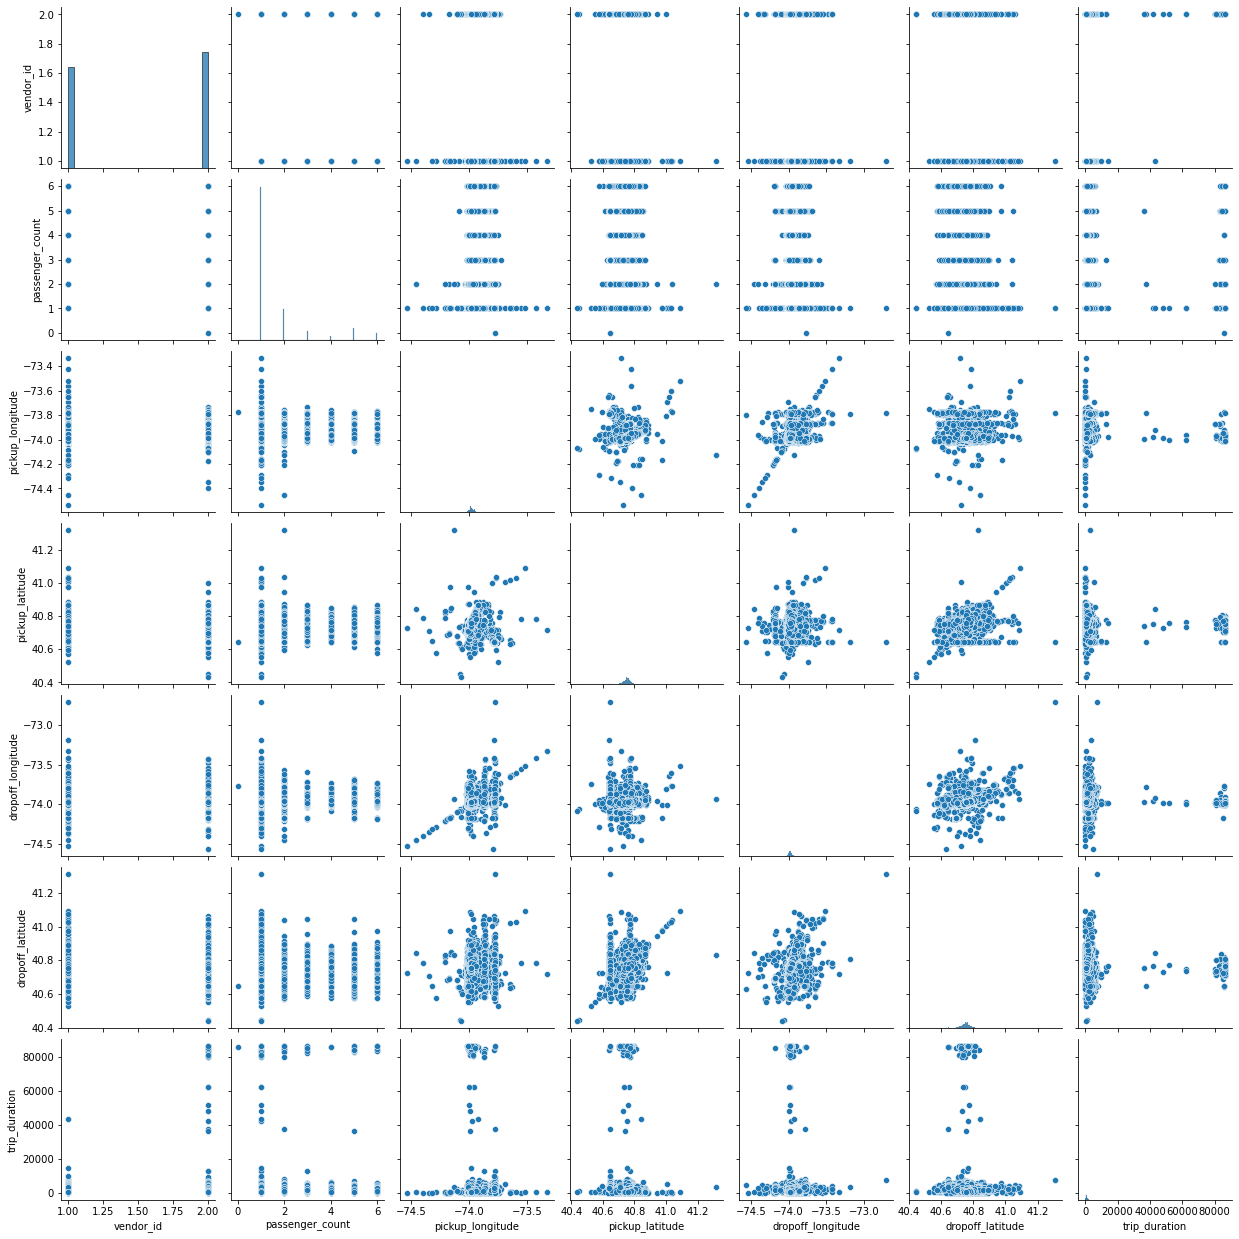

In [20]:
# Checking the pairplot. scatter plots: feature vs. feature, feature vs. target last column
sns.pairplot(df)
plt.show()

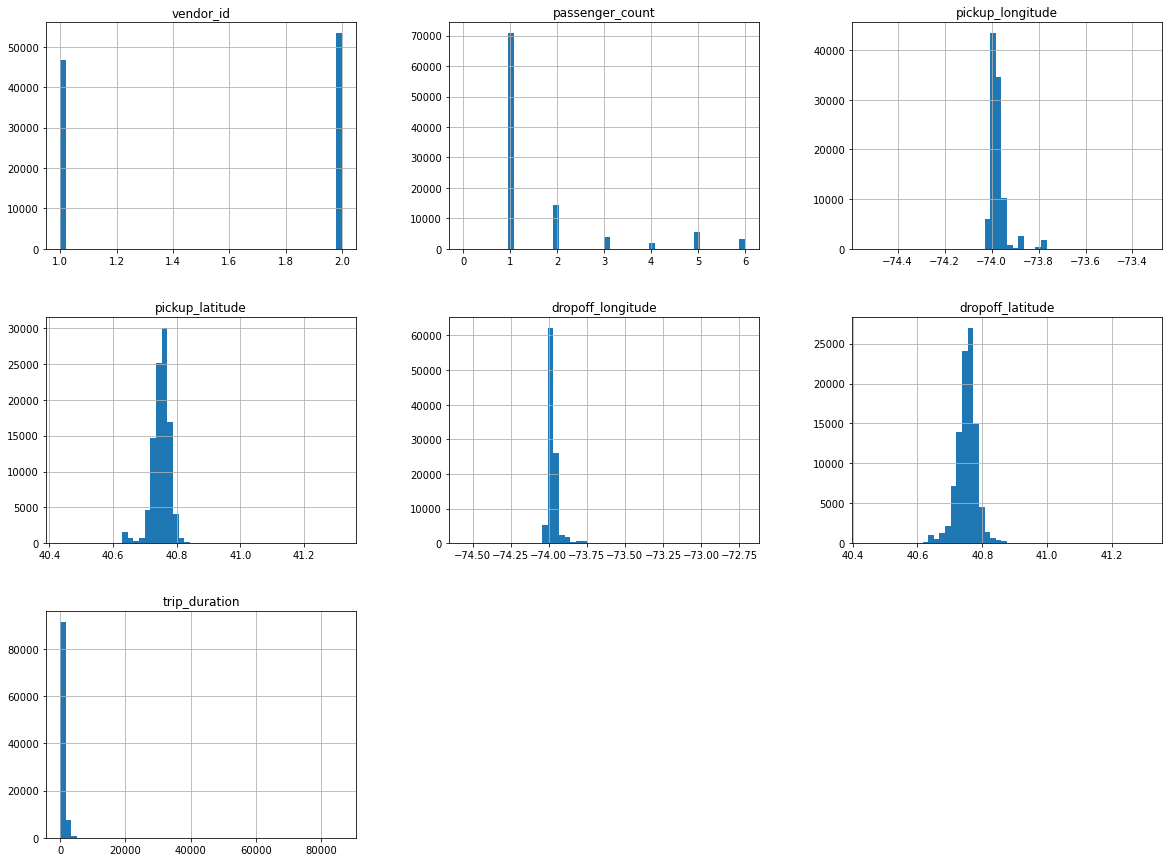

In [21]:
# Hists bar charts for features
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [22]:
#Sklearn regressors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [24]:
to_drop = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X, y = df[to_drop].copy(), df['trip_duration'].copy()
print(X.shape, y.shape)

(100000, 6) (100000,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
75220,2,1,-73.998558,40.764042,-73.991142,40.765442
48955,1,1,-73.961540,40.780277,-73.984222,40.769653
44966,1,1,-73.957184,40.780499,-73.959480,40.774239
13568,1,1,-73.968987,40.763752,-73.974937,40.752789
92727,2,1,-73.990913,40.734741,-73.972710,40.780849


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression(copy_X=True ,normalize=True).fit(X_train, y_train);

In [28]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
#some_data_prepared = 

print("Actual - Predicted")
for exp, act in zip(some_labels.values, lin_reg.predict(some_data)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
917 1052 (+14.73%)
1031 933 (-9.47%)
878 608 (-30.70%)
1872 1891 (+1.00%)
548 949 (+73.09%)


In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))

MAE: 569.4380349576417
MSE: 9599805.84232765
RMSE: 3098.3553447478635


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
def normalize(X):#Feature selection and augmentation ? and  Custom linear regressor
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [33]:
def prepare_X(X):#Feature selection and augmentation
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [34]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [35]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y) ** 2)/(2*m)
    return J

In [36]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha = np.dot(hypothesis(X,theta) - y, X) / m
    return d_thetha

In [37]:
def gradient_descent(X, y, theta, alpha, eps = 0.005, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        delta = derivative(X, y, theta)
        theta = theta - delta * alpha
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if ((abs(J_history[-1] - J_history[-2]) < eps) or (i > numiters)):
            break
        
    return theta, J_history

In [38]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [39]:
X_train_norm, mean, std = normalize(X_train)#all function for regressor
print('mean: ', mean.shape)
print('std: ', std.shape)
X_prep = prepare_X(X_train_norm)
y_prep = y_train[:]
theta = np.array([0, 0, 0, 0, 0, 0, 0])

mean:  (6,)
std:  (6,)


In [40]:
print('X_prep: {}'.format(X_prep.shape))
print('y_prep: {}'.format(y_prep.shape))
print(cost_function(X_prep, y_prep, theta))

X_prep: (80000, 7)
y_prep: (80000,)
4867382.3067875


In [41]:
alpha = 0.01
eps = 0.00001
numiters = 2000
new_theta, Js = gradient_descent(X_prep, y_prep, theta, alpha, eps, numiters, print_J=False)
print("new thata shape:", new_theta.shape)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
print(cost_function(X_prep, y_prep, new_theta))

new thata shape: (7,)
Theta 0: 935.4709291919725; Theta 1: 91.24358669879676
4380943.546875648


In [42]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
some_data_prepared = prepare_X(some_data)

print("Actual - Predicted")
for exp, act in zip(some_labels.values, Predict(some_data, mean, std, new_theta)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
917 1052 (+14.72%)
1031 933 (-9.47%)
878 608 (-30.70%)
1872 1890 (+0.99%)
548 949 (+73.08%)


In [43]:
X_test_prep = prepare_X(X_test)
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

#print('X: ', X_test_prep.shape, 'y_actual: ', y_test.shape, 'y_pred: ', y_test_pred.shape)
#print('Rell dif:\n', rel_diff)

#res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
#print(res)
print(cost_function(X_test_proc, y_test, new_theta))

4799903.54711461


In [44]:
#Results evaluation
print('MAE:', metrics.mean_absolute_error(y_test, Predict(X_test, mean, std, new_theta)))
print('MSE:', metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta))))

MAE: 569.4371480480493
MSE: 9599807.094229227
RMSE: 3098.355546774648
